# Homework 6 - Week 11

#### Problem 1

**(a)**
You are using a Geiger counter to locate a radiation source. Moving around in the room where you believe the source is located, you are recording $50$ counts-per-minute (CPM) at one location. When you move $50 cm$ in one direction, the reading on the Geiger counter increases to $62.5 CPM$. 

NOTE: You can neglect any background radiation considerations for all parts. 

Assuming there is nothing in between you and the source, what is the distance to the source?

**(b)**
What count rate would you measure directly from the source (estimate this by calculating the count rate at $5 cm$).

**(c)**
If you see that the distance you estimated in part one would put the source on the other side of a concrete wall, does this change your estimate of the position of the source? Would it change your estimate of the count rate you would measure right next to the source (at $5 cm$)? Taking the wall thickness to be $20 cm$, and the linear attenuation coefficient for gamma radiation through concrete to be $0.15/cm$, update your answers for parts (a) and (b) accordingly.


(a) 

(b) 

(c)

#### Problem 2

Remembering that the rule of thumb for counting statistics only applies to total counts, meaning you then need to propogate that uncertainty to get the uncertainty on any CPM values stated, we will now concider how uncertainties would impact our results for problem 1.

**(a)**
If the estimates for the CPM values measured at each position in the first problem were made by collecting counts over 10 minutes, what is the uncertainty on the two CPM measurements?

**(b)**
What would be the resulting uncertainty on the distance to the source calculated in part **1.a**?

NOTE 1: For $F(x) = C\sqrt{x}$, the percent uncertainty on $F$ can be determined using $(\frac{\sigma_F}{F})^2 \approx (\frac{\sigma_x}{2x})^2$. <br>
NOTE 2: NOTE 1 is a good approximation even if you instead have a function that depends on $\sqrt{x}$ in some non-linear way (e.g. $\frac{1}{(1-\sqrt{x})}$). <br>
NOTE 3: Similarly, for $F = A/B$ where both $A$ and $B$ have uncertainties, $(\frac{\sigma_F}{F})^2 \approx (\frac{\sigma_A}{A})^2 + (\frac{\sigma_B}{B})^2$.

**(c)**
What would be the uncertainty on your calculation of the count-rate from the source (at $5 cm$)?

#### Problem 3

Please include your lab work here - including all data plots and calculations for the attenuation coefficients for your different materials. This portion of the homework can be copied from your shared lab work.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
url1 = 'https://raw.githubusercontent.com/ABLREY/ENGIN-11-/main/countdata1.csv'
url2 = 'https://raw.githubusercontent.com/ABLREY/ENGIN-11-/main/al1.csv'
url3 = 'https://raw.githubusercontent.com/ABLREY/ENGIN-11-/main/al2.csv'
url4 = 'https://raw.githubusercontent.com/ABLREY/ENGIN-11-/main/al3.csv'
url5 = 'https://raw.githubusercontent.com/ABLREY/ENGIN-11-/main/tu1.csv'
url6 = 'https://raw.githubusercontent.com/ABLREY/ENGIN-11-/main/tu2.csv'
url7 = 'https://raw.githubusercontent.com/ABLREY/ENGIN-11-/main/tu3.csv'

NoBarrier = pd.read_csv(url1)
OneAluminum = pd.read_csv(url2)
TwoAluminum = pd.read_csv(url3)
ThreeAluminum = pd.read_csv(url4)
OneTungsten = pd.read_csv(url5)
TwoTungsten = pd.read_csv(url6)
ThreeTungsten = pd.read_csv(url7)

In [40]:
display(NoBarrier)

,Timestamp,Count (per 10s)
0,2025-04-04T15:25:54.667011,12
1,2025-04-04T15:26:04.677560,7
2,2025-04-04T15:26:14.686715,11
3,2025-04-04T15:26:24.697237,8
4,2025-04-04T15:26:34.702817,12
5,2025-04-04T15:26:44.713133,7
6,2025-04-04T15:26:54.723619,9
7,2025-04-04T15:27:04.734069,5
8,2025-04-04T15:27:14.744595,10
9,2025-04-04T15:27:24.755103,14


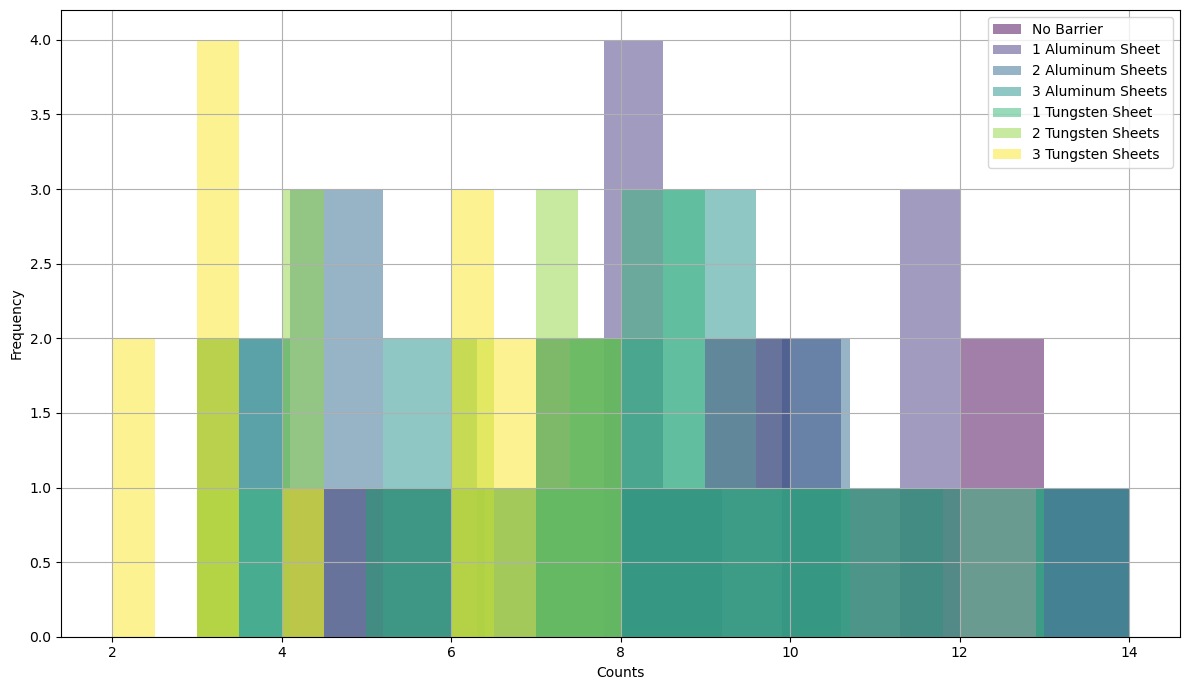

In [41]:
dataframes = [
    (NoBarrier, 'No Barrier'),
    (OneAluminum, '1 Aluminum Sheet'),
    (TwoAluminum, '2 Aluminum Sheets'),
    (ThreeAluminum, '3 Aluminum Sheets'),
    (OneTungsten, '1 Tungsten Sheet'),
    (TwoTungsten, '2 Tungsten Sheets'),
    (ThreeTungsten, '3 Tungsten Sheets')
]

plt.figure(figsize=(12, 7))

colors = plt.cm.viridis(np.linspace(0, 1, len(dataframes)))

for (df, label), color in zip(dataframes, colors):
    plt.hist(df[' Count (per 10s)'], bins=10, alpha=0.5, label=label, color=color)

plt.xlabel("Counts")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [45]:
stats = []

for df, label in dataframes:
    mean = df[' Count (per 10s)'].mean()
    std_dev = df[' Count (per 10s)'].std()
    stats.append((label, mean, std_dev))

stats_df = pd.DataFrame(stats, columns=['Condition', 'Mean (μ)', 'Standard Deviation (σ)'])

print(stats_df.to_string(index=False))


        Condition  Mean (μ)  Standard Deviation (σ)
       No Barrier  9.000000                2.984810
 1 Aluminum Sheet  9.000000                2.296242
2 Aluminum Sheets  7.583333                3.315483
3 Aluminum Sheets  7.666667                3.025147
 1 Tungsten Sheet  7.916667                2.678478
2 Tungsten Sheets  5.583333                1.880925
3 Tungsten Sheets  4.333333                1.922751


How do the mean (μ) and standard deviation (σ) compare?
I can see that genrally as the mean decreases so does the std. This makes sense and follows poisson statisitcs. We can see that with no barrier the mean is higher and the spread is higher. With the tungsten barriers the mean decreases making the spread smaller. 

a. How do the measured standard deviations compare to the theoretical uncertainty you
would expect from counting statistics?
The standard deviation is pretty close to the theortical uncertainty. The standard deviation is expected to be approximately the square root of the mean, this is true for the no barrier at a mean of 9 and a standard deviation of 2.98.

b. What general trend do you see in the counts measured as a function of the thickness of
absorber material?
As the thickness of the absorber material increases the mean becomes lower, this is because the thicker materil attenuates the radiation better. 

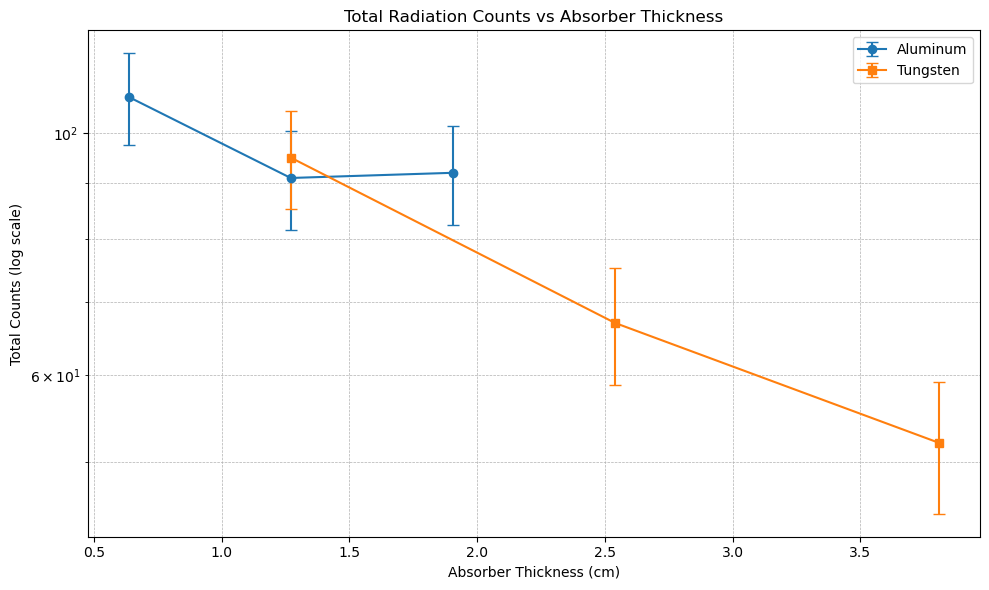

Estimated μ for Aluminum: 0.126 cm⁻¹
Estimated μ for Tungsten: 0.237 cm⁻¹


In [75]:
dataframes = [
    (OneAluminum, '1 Aluminum Sheet'),
    (TwoAluminum, '2 Aluminum Sheets'),
    (ThreeAluminum, '3 Aluminum Sheets'),
    (OneTungsten, '1 Tungsten Sheet'),
    (TwoTungsten, '2 Tungsten Sheets'),
    (ThreeTungsten, '3 Tungsten Sheets')
]

# thickness (in cm)
thickness_Al = np.array([0.635, 1.27, 1.905])
thickness_W = np.array([1.27, 2.54, 3.81])

counts_Al = []
errors_Al = []

counts_W = []
errors_W = []

for df, label in dataframes:
    total = df[' Count (per 10s)'].sum()
    uncertainty = np.sqrt(total)

    if 'Aluminum' in label:
        counts_Al.append(total)
        errors_Al.append(uncertainty)
    else:
        counts_W.append(total)
        errors_W.append(uncertainty)

counts_Al = np.array(counts_Al)
errors_Al = np.array(errors_Al)

counts_W = np.array(counts_W)
errors_W = np.array(errors_W)



plt.figure(figsize=(10, 6))

plt.errorbar(thickness_Al, counts_Al, yerr=errors_Al, fmt='o-', label='Aluminum', capsize=4)
plt.errorbar(thickness_W, counts_W, yerr=errors_W, fmt='s-', label='Tungsten', capsize=4)

plt.yscale('log')
plt.xlabel('Absorber Thickness (cm)')
plt.ylabel('Total Counts (log scale)')
plt.title('Total Radiation Counts vs Absorber Thickness')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

#4a and b
log_counts_Al = np.log(counts_Al)
log_counts_W = np.log(counts_W)

slope_Al, intercept_Al = np.polyfit(thickness_Al, log_counts_Al, 1)
slope_W, intercept_W = np.polyfit(thickness_W, log_counts_W, 1)

mu_Al = -slope_Al
mu_W = -slope_W

print(f"Estimated μ for Aluminum: {mu_Al:.3f} cm⁻¹")
print(f"Estimated μ for Tungsten: {mu_W:.3f} cm⁻¹")